In [1]:
#import Pkg; Pkg.add.(["Laplacians", "GraphMakie", "GLMakie", "CairoMakie", "NetworkLayout"])
using Graphs, LinearAlgebra, Laplacians, NetworkLayout, Latexify
if false
    using GLMakie
else
    using CairoMakie
end
using GraphMakie;

Entropy pool not available to seed RNG; using ad-hoc entropy sources.


<div style="float:center;width:100%;text-align: center;"><strong style="height:60px;color:darkred;font-size:40px;">Drawing Graphs With Julia</strong></div>

# 1. GraphMakie

## 1.1. Show a Graph

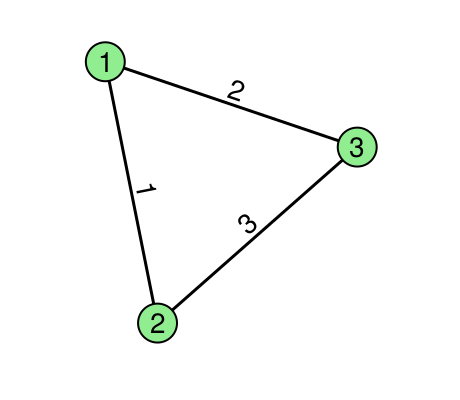

In [2]:
g = SimpleGraph( Laplacians.complete_graph(3))

f, ax, p = graphplot(g; node_color=:lightgreen,
                     ilabels=repr.(1:nv(g)),
                     elabels=repr.(1:ne(g)),
           )
hidedecorations!(ax); hidespines!(ax); ax.aspect = DataAspect()
xlims!(ax,-1.5,1.14)
ylims!(-2.3,0.65)
set_theme!(figure_padding = 15)
resize!(f.scene, (230,200)); resize_to_layout!(f)
f

## 1.2. Show a Digraph

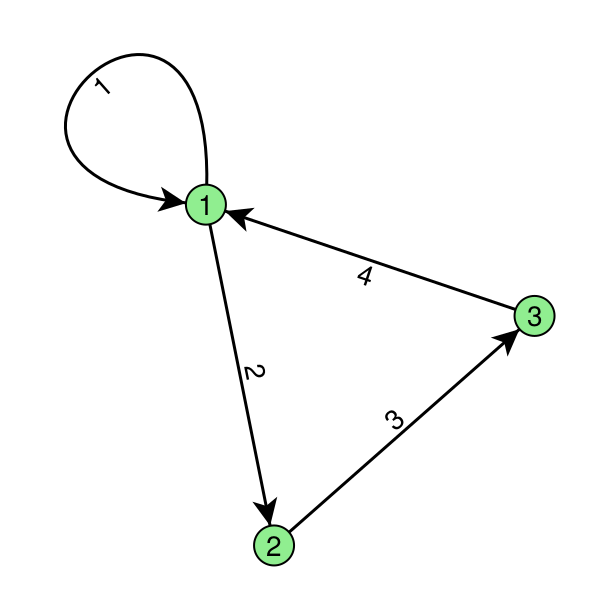

In [3]:
g = cycle_digraph(3)
add_edge!(g, 1, 1)
f, ax, p = graphplot(g; arrow_shift=:end, node_size=20, arrow_size=20,
                     node_color=:lightgreen,
                     ilabels=repr.(1:nv(g)),
                     elabels=repr.(1:ne(g)),
           )
hidedecorations!(ax); hidespines!(ax); ax.aspect = DataAspect()
set_theme!(figure_padding = 5)
resize!(f.scene, (300,300)); resize_to_layout!(f)
f

## 1.3 Show a Multidigraph

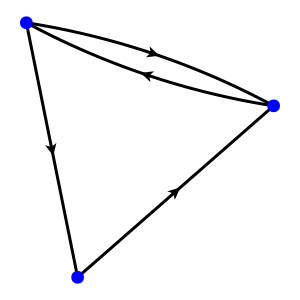

In [4]:
g = SimpleDiGraph(3); add_edge!(g, 1, 2); add_edge!(g, 2, 3); add_edge!(g, 3, 1); add_edge!(g, 1, 3)

f, ax, p = graphplot(g, node_color=:blue,)
hidedecorations!(ax); hidespines!(ax); ax.aspect = DataAspect()
set_theme!(figure_padding = 5)
resize!(f.scene, (150,150)); resize_to_layout!(f)
f

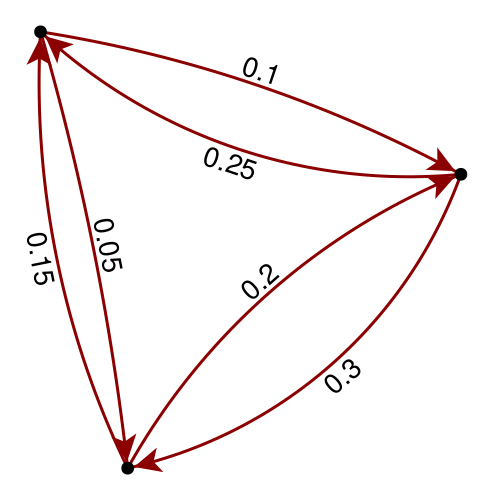

In [5]:
g = complete_digraph(3)
distances = collect(0.05:0.05:ne(g)*0.05)
elabels = repr.(round.(distances, digits=2))
f, ax, p = graphplot(g;edge_color=:darkred, curve_distance=distances, elabels, arrow_size=20, arrow_shift=:end)
hidedecorations!(ax); hidespines!(ax); ax.aspect = DataAspect()
resize!(f.scene, (250,250)); resize_to_layout!(f)
f

# 2. Laplacians.jl

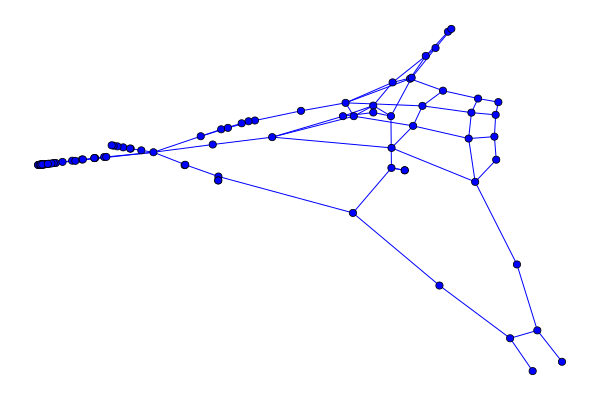

In [6]:
a = chimera(99,1)
spectral_drawing(a);

In [7]:
wted_chimera(100,4)

100×100 SparseArrays.SparseMatrixCSC{Float64, Int64} with 378 stored entries:
⎡⠀⠀⢄⠀⠀⠁⠀⠀⠀⠄⠀⠀⠀⠀⠀⠆⠀⠠⠄⠂⠠⠀⡀⠀⠒⠈⠀⠀⠀⠀⠀⠠⠰⠀⠄⠀⡀⠐⠠⠀⎤
⎢⠀⠑⠀⠀⠠⡀⠄⠀⠁⠀⠀⡀⠁⠠⠀⠀⠀⡀⠀⠀⠀⠀⠡⠀⠈⠀⠈⠀⠀⠀⠀⠐⠀⠈⢈⠄⠀⠀⠀⠀⎥
⎢⠄⠀⠀⠢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠄⠀⠀⠀⢠⠈⠀⠈⠀⠤⠀⠀⠐⠀⢀⠐⠀⠀⠀⠂⠀⠀⠀⠀⠀⠀⠔⎥
⎢⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠁⠀⡀⠀⠀⠀⠀⠀⠀⡐⠀⠀⢀⠀⠠⠀⡀⠄⠀⠀⠀⠀⠄⠀⠀⠀⠀⠐⠄⠀⎥
⎢⠀⠄⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⡀⠂⠀⠀⠀⠀⠄⠀⠀⠀⢆⠀⠂⠀⠀⠀⡠⠀⠀⠀⎥
⎢⠀⠀⠀⠠⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠂⠈⠀⠂⠀⢄⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠠⠠⠀⠀⠠⠠⢀⎥
⎢⠀⠀⠁⡀⠀⠄⠀⠈⠀⠀⠀⠀⠀⠀⠀⠁⠀⠠⠀⠀⠁⠀⠈⠀⠌⠀⠐⡄⠀⠐⢀⢀⠀⠀⠀⠀⠈⠀⠀⠀⎥
⎢⠠⠄⠀⠀⠀⠀⠀⠀⠀⠀⠠⠀⠄⠀⠄⠁⠐⠀⠀⠠⠀⠀⡀⠀⠈⠀⠀⠀⠀⠀⠂⡀⡀⠀⠀⠄⠀⠀⠀⠀⎥
⎢⠀⡀⠀⠠⠀⣀⠀⠀⠀⠀⠂⠀⠀⡀⠐⠀⠀⠀⠠⠀⠀⠀⠄⠀⠀⠀⠀⠀⠐⡀⠄⢀⠐⠀⠁⠁⠀⢀⠐⠐⎥
⎢⠠⠁⠀⠀⠂⠀⢀⠠⠁⠀⠈⠀⠀⠀⠀⡀⠀⠂⠀⠀⠰⠀⠀⠀⠐⠀⠀⠀⠈⠀⠀⠨⢀⠀⠄⠠⠂⠀⠀⠀⎥
⎢⠀⠂⠀⠀⠂⠀⠀⠀⠠⠈⠀⠑⠁⠀⠀⠀⠀⠀⠐⠂⠀⠀⠀⠂⠠⠀⢐⠀⡀⠀⠀⡀⠀⡀⠀⠀⠀⠀⠀⠈⎥
⎢⠀⠈⠁⠂⠀⠃⠀⠐⠀⠀⠀⠂⠂⠀⠀⠈⠀⠁⠀⠀⠠⠀⠴⠃⢘⠀⠀⠀⠐⠀⠂⠐⠀⠀⠀⠀⠒⠀⠠⢁⎥
⎢⡘⠀⠂⠀⢀⠀⠀⠂⠀⠀⠀⠀⠂⠁⠂⠀⠀⠀⠐⠀⠀⠂⠒⠐⢀⠐⠀⠒⠄⠈⠐⠀⠀⠀⠢⠀⠂⠊⠄⠐⎥
⎢⠀⠀⠂⠀⠀⢀⠀⠌⠀⠁⠀⠀⠐⠤⠀⠀⠀⠀⠀⠀⠐⠐⠀⠀⢠⠀⠐⠀⢜⠄⠀⠀⠀⠀⠀⠠⠂⠐⠀⠀⎥
⎢⠀⠀⠀⠀⠐⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠐⠠⠂⠀⠀⠈⠐⠀⡀⠁⠒⠕⠀⠀⠂⠀⢀⠀⠀⠀⠀⠀⠀⠐⎥
⎢⠀⡀⢀⠀⠀⠀⠀⠀⠈⠑⠀⠀⠀⢐⠈⠠⠀⢁⡀⡀⠀⠠⢈⠀⠐⠀⠀⠀⠈⠀⠀⠀⠄⠀⠐⠀⠀⠁⠀⠀⎥
⎢⠐⠂⡀⠀⠈⠀⠀⠁⠈⠀⠁⡀⠀⠀⠀⠈⠐⠀⠀⠐⠀⠠⠀⠀⠀⠀⠀⠀⠀⠐⠀⠁⠀⠀⠄⠀⠑⠀⠀⠀⎥
⎢⠀⠁⠂⠔⠀⠀⠀⠀⠀⠀⠀⠂⠀⠀⠀⠄⠅⠀⠀⡁⠀⠀⠀⠀⠈⠂⠀⡀⠀⠀⠐⠀⠀⠁⠀⠀⠠⠀⠁⠀⎥
⎢⢀⠈⠀⠀⠀⠀⢀⠀⠀⠊⠀⡀⠂⠀⠀⠀⠀⢀⠈⠀⠀⠀⠘⠀⡨⠀⢈⠀⠀⠀⠄⠀⠑⠀⠀⠂⠀⠀⠄⠂⎥
⎣⠀⠂⠀⠀⢀⠄⠀⠁⠀⠀⠀⢂⠀⠀⠀⠀⢐⠀⠀⠀⡀⠀⠄⢂⢀⠁⠀⠀⢀⠀⠀⠀⠀⠀⠁⠀⠠⠁⠀⠀⎦

# 3. Calling R

In [8]:
using RCall
R"suppressMessages((library(ggplot2)))"
R"suppressMessages(library(igraph))";

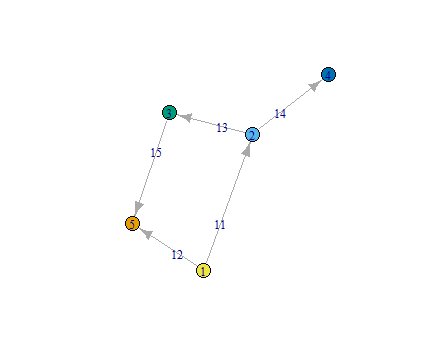

In [9]:
R"""g       <- make_graph(edges = c(1,2,  1,5,  2,3,  2,4,  3,5 ), 5, directed = TRUE)
V(g)$f      <- c(3,-1,2,4,-2)
E(g)$weight <- c( 11,12,13,14,15)
plot(g, vertex.color=as.factor(V(g)$f), edge.label=as.factor(E(g)$weight ));
"""
;